# Working with Sites

A Site is container for web addressable content. Sites is a feature supported in both ArcGIS Online (through ArcGIS Hub) and ArcGIS Enterprise. 

We will start by exploring Sites as supported in ArcGIS Hub. A site within ArcGIS Hub exists on it's own or could be part of an initiative. 

In [1]:
from arcgishub.hub import Hub
from datetime import datetime
from datetime import timezone
now = datetime.now(timezone.utc)

In [2]:
myhub = Hub("https://dcdev.maps.arcgis.com/", "username", "password")

### Creating initiative with site

In [3]:
title = 'Manushi new %s' %int(now.timestamp() * 1000)
initiative1 = myhub.initiatives.add(title=title)
initiative1.item

<Item title:"Manushi new 1579820188262" type:Hub Initiative owner:mmajumdar_dcdev>

### Searching for sites

In [5]:
sites = myhub.sites.search(title='Manushi', owner='mmajumdar_dcdev')[:3]
sites

[<Site title:"Manushi new site-copy-1579804643088" owner:mmajumdar_dcdev>,
 <Site title:"Manushi Data Inventory DC v2" owner:mmajumdar_dcdev>,
 <Site title:"initiative source test - manushi1" owner:mmajumdar_dcdev>]

### Fetching the site for above `initiative1`

In [6]:
site1_id = initiative1.site_id
site1_id

'8482caf8b83e412f9ece8a3162c0fc77'

In [7]:
site1 = myhub.sites.get(site1_id)
site1

<Site title:"Manushi new 1579820188262" owner:mmajumdar_dcdev>

In [8]:
site1.url

'https://manushi-new-1579820188262-dcdev.hub.arcgis.com'

### Update a site

In [9]:
print(site1.description)

DO NOT DELETE OR MODIFY THIS ITEM. This item is managed by the ArcGIS Hub application. To make changes to this site, please visit https://hub.arcgis.com/admin/


In [10]:
site1.update(site_properties={'description': 'Testing site update'})

True

In [11]:
print(site1.description)

Testing site update


### Copy a Hub site within the same org

A __preferred__ pattern for implementing this would be to clone the initiative for this site, using the `initiatives` module. While you can clone the site object too, note that the result obtained from that method will be the __initiative__ object for that site.

Here is an example:

In [12]:
s2 = myhub.initiatives.clone(initiative1)
s2.item

<Item title:"Manushi new 1579820188262-copy-1579820318369" type:Hub Initiative owner:mmajumdar_dcdev>

In [13]:
type(s2)

arcgishub.hub.Initiative

### Clone Hub site to another Hub org

While we would work with the `sites` module to clone sites across organizations, to clone a Hub site (site that belongs to an initiative) from one Hub organization to another, it is necessary to clone the __initiative__.

Here is an example:

In [14]:
newHub = Hub("https://cityx.maps.arcgis.com", "username", "password")

In [15]:
s_clone = newHub.initiatives.clone(initiative1, origin_hub=myhub)
s_clone.item

<Item title:"Manushi new 1579820188262-copy-1579820335724" type:Hub Initiative owner:mmajumdar_cityx>

In [16]:
type(s_clone)

arcgishub.hub.Initiative

However, if you use the `initiatives` module to clone the initiative to an Enterprise organization or a Non Hub ArcGIS Online organization, it will return just the cloned site item.

Here is an example:

In [17]:
nonhub = Hub("https://prod-bas-hub.maps.arcgis.com", "username", "password")

In [18]:
s3 = nonhub.initiatives.clone(initiative1, origin_hub=myhub)
s3.item

<Item title:"Manushi new 1579820188262-copy-1579820349214" type:Hub Site Application owner:prod_bas_hub_admin>

In [19]:
type(s3)

arcgishub.sites.Site

### Deleting sites and initiatives

In [20]:
#Deleting site
s3.delete()

True

In [21]:
#Deleting initiative
s_clone.delete()

True

## Testing Enterprise Sites

In [23]:
eHub = Hub("http://dev0004025.esri.com/portal", "username", "password")

### Add Enterprise site

In [24]:
title = 'site python %s' %int(now.timestamp() * 1000) 
esite = eHub.sites.add(title=title)
esite.item

<Item title:"site python 1579820188262" type:Site Application owner:admin>

### Update Enterprise site

In [25]:
print(esite.description)

DO NOT DELETE OR MODIFY THIS ITEM. This item is managed by the ArcGIS Enterprise Sites application. To make changes to this site, please visithttp://dev0004025.esri.com/portalapps/sites/admin/


In [26]:
esite.update(site_properties={'description': 'This is my test site on enterprise'})

True

In [27]:
print(esite.description)

This is my test site on enterprise


### Deleting site

In [28]:
esite.delete()

True

### Fetching site

In [29]:
s = eHub.sites.get('9151ed50de0541368316bbfca6557464')
s.item

<Item title:"Manushi new site" type:Site Application owner:admin>

### Cloning the site within the same organization

In [30]:
cloned_s = eHub.sites.clone(s)

In [32]:
cloned_s.item

<Item title:"Manushi new site-copy-1579820484869" type:Site Application owner:admin>

### Cloning from Enterprise to ArcGIS Online

In [33]:
agol_s = myhub.sites.clone(s)
agol_s.item

<Item title:"Manushi new site-copy-1579820509327" type:Hub Initiative owner:mmajumdar_dcdev>

### Cloning from ArcGIS Online to Enterprise

<Item title:"where-is-extent-new" type:Hub Site Application owner:mmajumdar_dcdev>
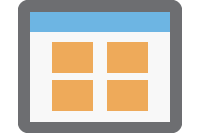

In [34]:
site = myhub.sites.get('f5a1b81f42c1490995696c7478b09e50')
site.item

In [35]:
e_site = eHub.sites.clone(site)
e_site.item

<Item title:"where-is-extent-new-copy-1579820530280" type:Site Application owner:admin>